NUS Assignment by Syed Salman Rabbani | Week 2

# Customer Segmentation using K-Means Clustering

Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples


Loading File

In [10]:
df = pd.read_csv('customer_data.csv')
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Age                     200 non-null    int64  
 2   Annual Income (k$)      200 non-null    int64  
 3   Spending Score (1-100)  200 non-null    float64
 4   Purchase Frequency      200 non-null    float64
 5   Avg Purchase Value      200 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 9.5 KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Purchase Frequency,Avg Purchase Value
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,43.42500,67.145000,50.869302,5.335500,43.092021
std,57.879185,14.94191,31.249587,22.563855,2.687808,29.326249
min,1.000000,18.00000,15.000000,1.000000,0.600000,10.000000
25%,50.750000,31.00000,41.000000,32.366332,3.000000,17.651673
50%,100.500000,43.50000,66.500000,52.352457,5.450000,36.086311
75%,150.250000,56.00000,95.250000,67.224241,7.600000,59.641832
max,200.000000,69.00000,119.000000,100.000000,10.000000,137.621150


EDA

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Purchase Frequency        0
Avg Purchase Value        0
dtype: int64


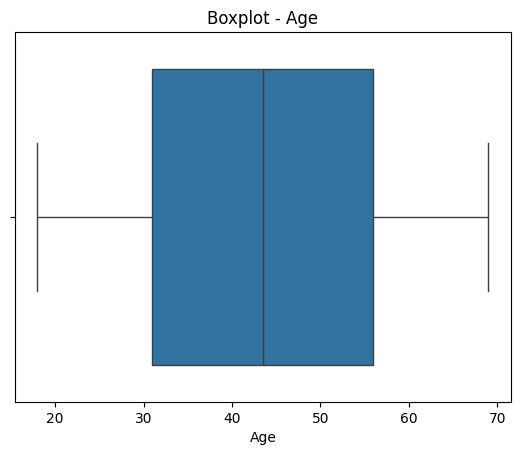

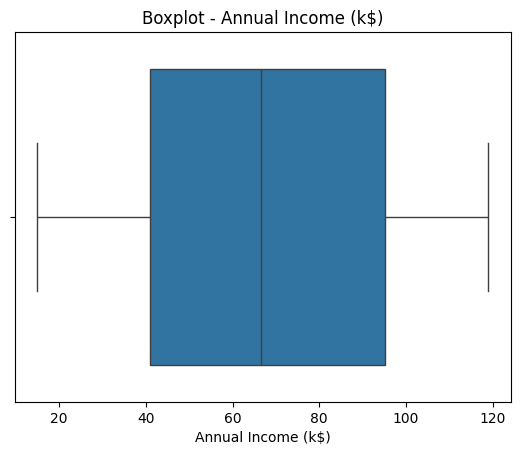

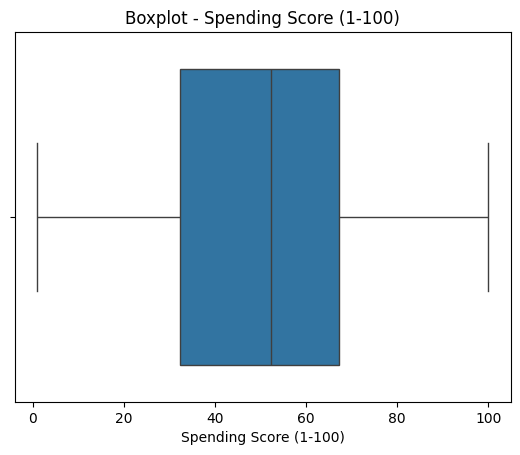

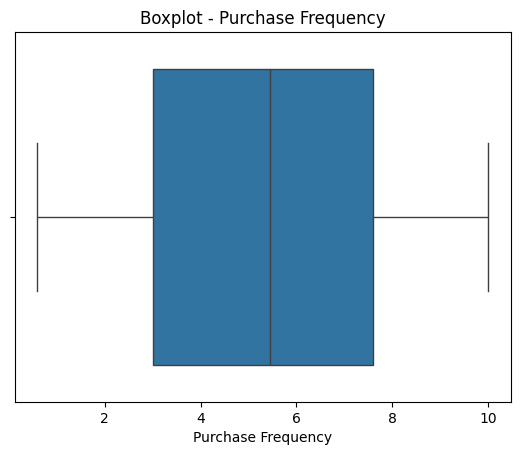

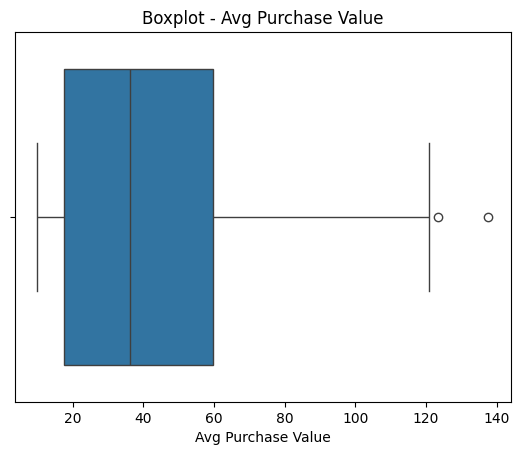

In [11]:
# Check for missing values
print(df.isnull().sum())

# Boxplots for outliers
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
            'Purchase Frequency', 'Avg Purchase Value']

for feature in features:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot - {feature}')
    plt.show()


Visualization

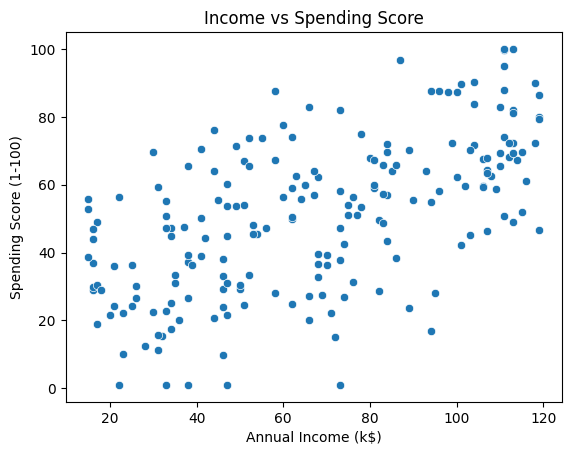

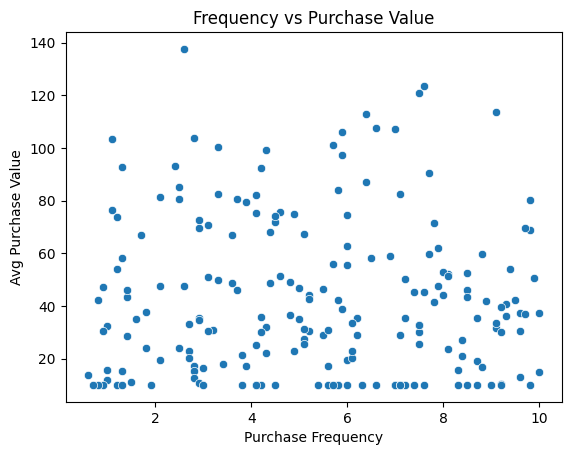

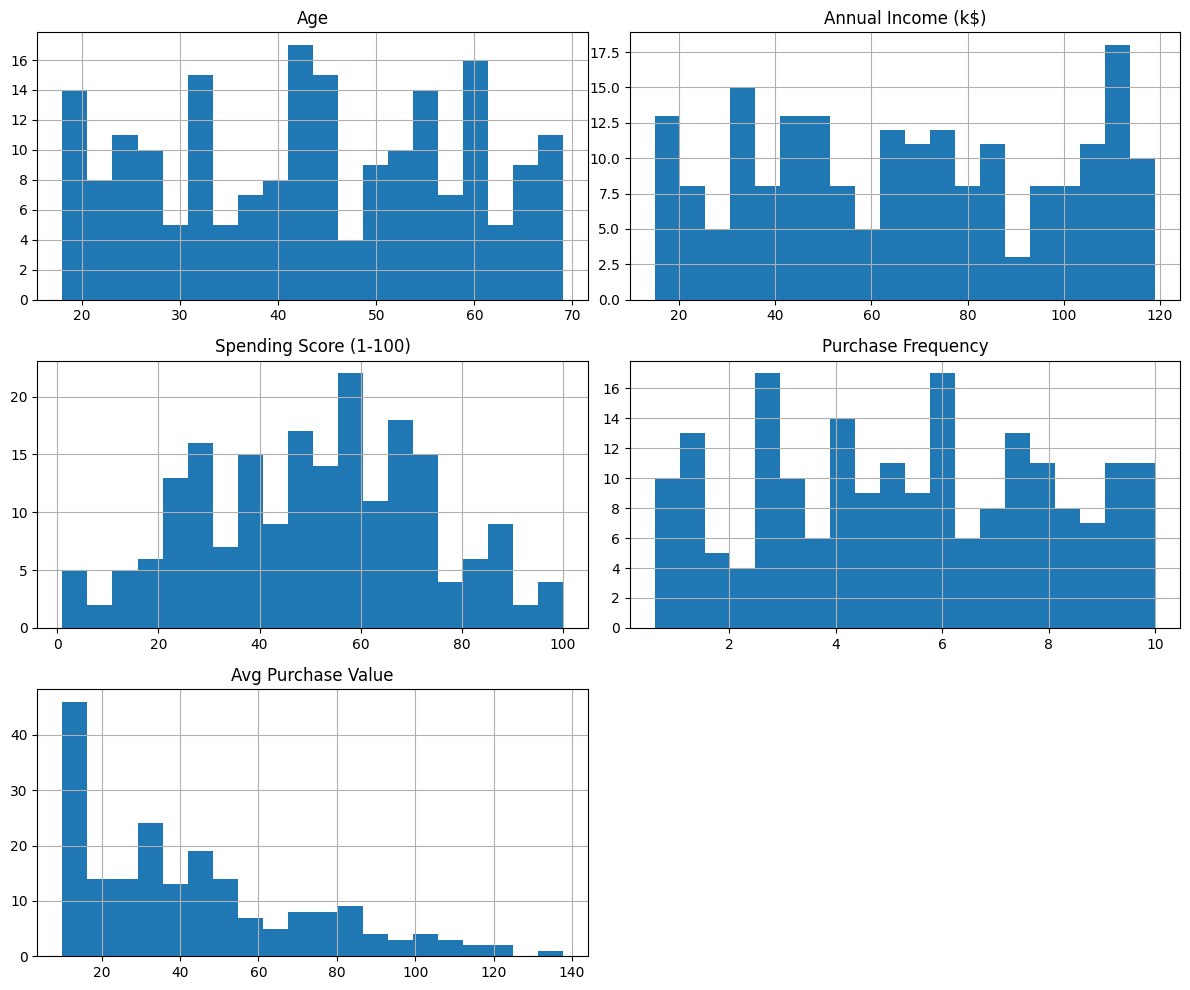

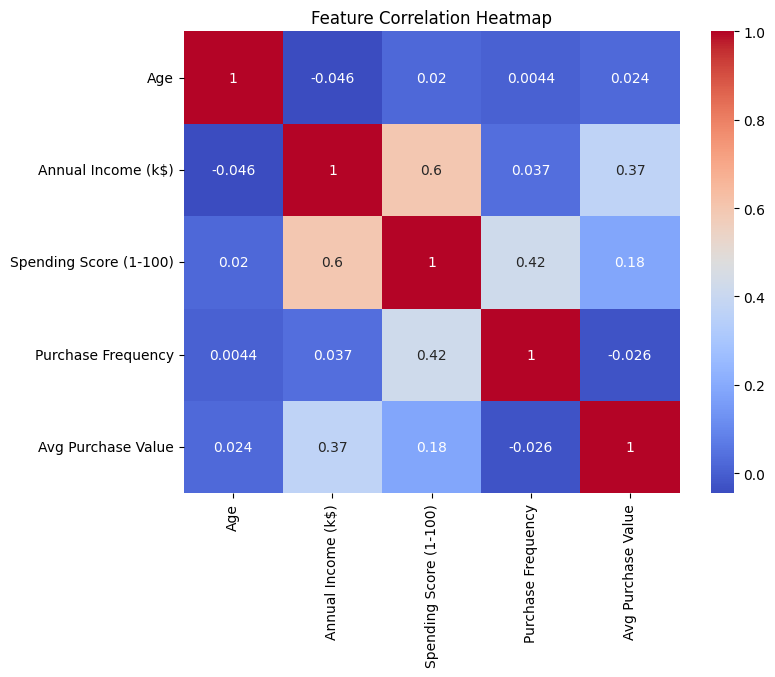

In [13]:
# Scatter plots
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Income vs Spending Score')
plt.show()

sns.scatterplot(x='Purchase Frequency', y='Avg Purchase Value', data=df)
plt.title('Frequency vs Purchase Value')
plt.show()

# Distribution plots
df[features].hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


Data Preprocessing

In [4]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])


To Find Optimal Number of Clusters

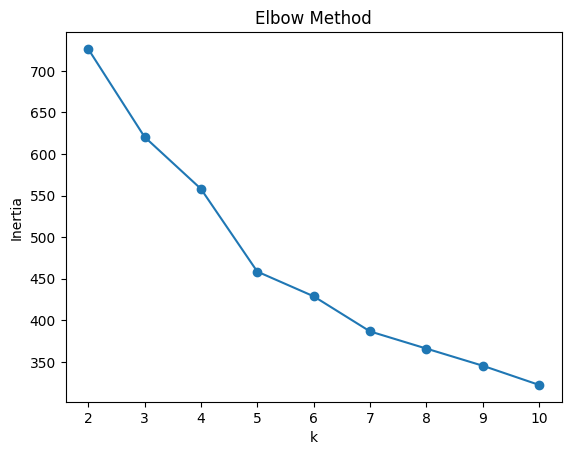

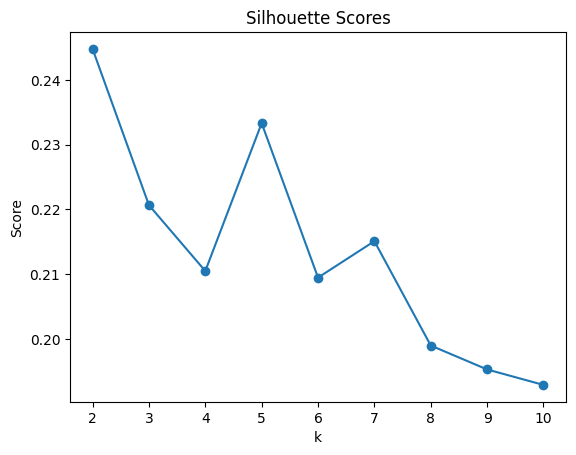

In [14]:

inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('k')
plt.ylabel('Score')
plt.show()


Silhouette Score

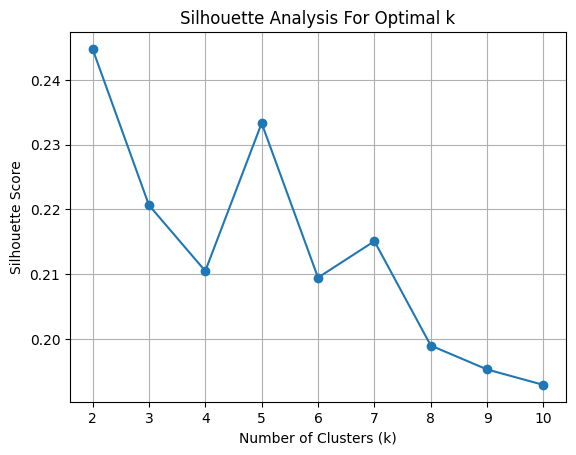

In [15]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.grid()
plt.show()


 K-Means Clustering

In [19]:

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


Cluster Visualization

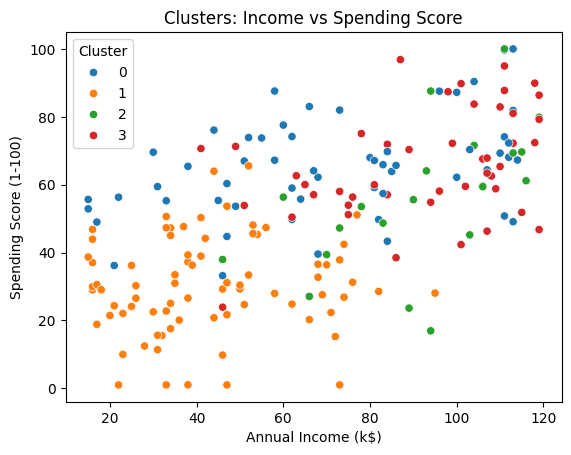

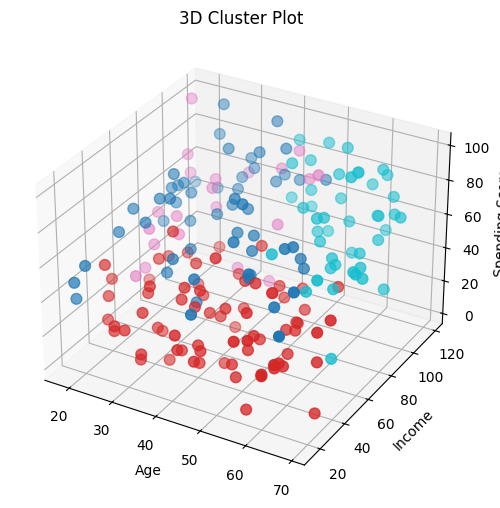

In [20]:
# 2D Plots
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='tab10')
plt.title('Clusters: Income vs Spending Score')
plt.show()

# 3D Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],
           c=df['Cluster'], cmap='tab10', s=60)
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending Score')
ax.set_title('3D Cluster Plot')
plt.show()


Cluster Summary

In [21]:
cluster_summary = df.groupby('Cluster')[features].mean().reset_index()
print(cluster_summary)


   Cluster        Age  Annual Income (k$)  Spending Score (1-100)  \
0        0  36.017544           71.052632               64.980412   
1        1  44.142857           42.896104               30.285445   
2        2  29.380952           91.857143               55.901589   
3        3  58.133333           92.155556               65.868094   

   Purchase Frequency  Avg Purchase Value  
0            7.392982           29.679617  
1            3.983117           29.023066  
2            5.042857           96.876565  
3            5.180000           59.055158  


In [8]:

df.groupby('Cluster')[features].mean().round(2)


,Age,Annual Income (k$),Spending Score (1-100),Purchase Frequency,Avg Purchase Value
Cluster,,,,,
0,36.02,71.05,64.98,7.39,29.68
1,44.14,42.90,30.29,3.98,29.02
2,29.38,91.86,55.90,5.04,96.88
3,58.13,92.16,65.87,5.18,59.06


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Purchase Frequency'].plot(kind='hist', bins=20, title='Purchase Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Age', y='Annual Income (k$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Spending Score (1-100)', y='Purchase Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Purchase Frequency', y='Avg Purchase Value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Annual Income (k$)'].plot(kind='line', figsize=(8, 4), title='Annual Income (k$)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Spending Score (1-100)'].plot(kind='line', figsize=(8, 4), title='Spending Score (1-100)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Purchase Frequency'].plot(kind='line', figsize=(8, 4), title='Purchase Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)